# Import the require libraries and images

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import match_template
from PIL import Image

ImagenTotal = np.asarray(Image.open('Input\Total.png'))


# Interactive selection of points

In [2]:
puntosinteres = []

<IPython.core.display.Javascript object>


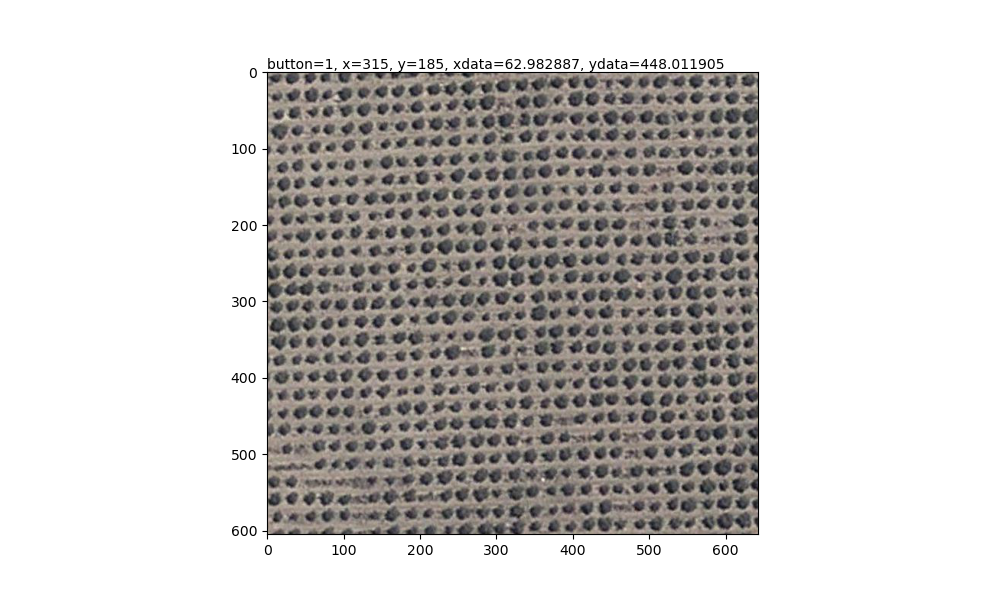

In [3]:
#plot points over the image and select more if you want
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.imshow(ImagenTotal, cmap=plt.cm.gray)
ax.scatter([x[0] for x in puntosinteres],[y[1] for y in puntosinteres],c='red', marker='+', s=8)
text=ax.text(0,0, "", va="bottom", ha="left")

def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    text.set_text(tx)
    puntosinteres.append([event.xdata, event.ydata])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

<IPython.core.display.Javascript object>


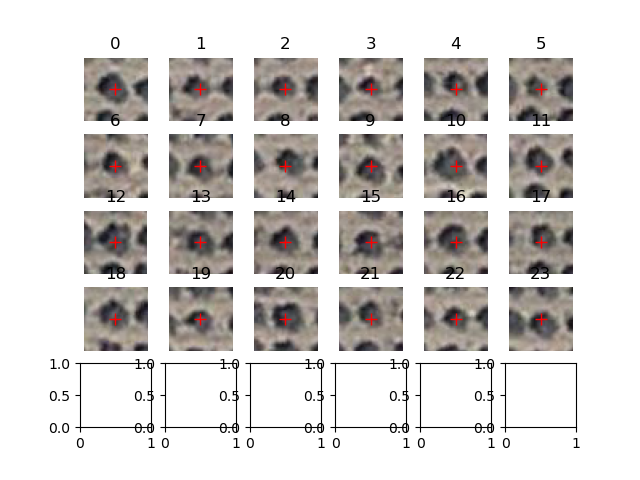

In [4]:
#show all the points of interest, please be careful to have a complete image, otherwise the model wont run
fig, ax = plt.subplots(len(puntosinteres)//6+1, 6)
i = 0
for item in puntosinteres:
    xinteres = int(item[0])
    yinteres = int(item[1])
    radio = 20
    ax[i//6,i-i//6*6].imshow(ImagenTotal)
    ax[i//6,i-i//6*6].plot(xinteres,yinteres,color='red', linestyle='dashed', marker='+',
     markerfacecolor='blue', markersize=8)
    ax[i//6,i-i//6*6].set_xlim(xinteres-radio,xinteres+radio)
    ax[i//6,i-i//6*6].set_ylim(yinteres-radio,yinteres+radio)
    ax[i//6,i-i//6*6].axis('off')
    ax[i//6,i-i//6*6].set_title(i)
    i+=1

In [5]:
#in case you have a wrong point or a incomplete image please uncomment the following line with the point index to delete it
#del puntosinteres[13]
len(puntosinteres)

24

# Match the image to the template

In [6]:
listaresultados = []
for punto in puntosinteres:
    xinteres = int(punto[0])
    yinteres = int(punto[1])
    radio=10
    imagenband = ImagenTotal[:,:,0]
    templateband = ImagenTotal[yinteres-radio:yinteres+radio,xinteres-radio:xinteres+radio,0]
    result= match_template(imagenband, templateband)
    result = np.where(result>0.85)
    listaresultados.append(result)

# Plot interpreted points over the image

<IPython.core.display.Javascript object>


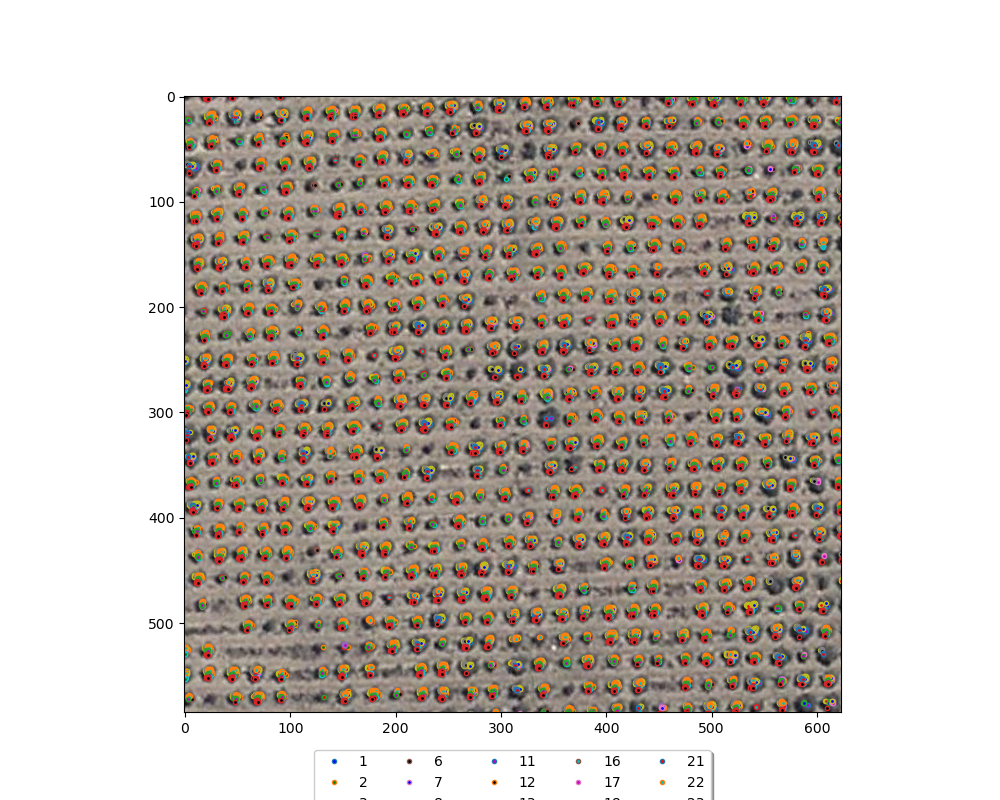

In [7]:
from itertools import cycle
cycol = cycle('bgrcmk')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

i = 1
for lista in listaresultados:
    ax.plot(lista[1],lista[0], '.', linewidth=0, markerfacecolor=next(cycol), label=i)
    i+=1
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
ax.imshow(ImagenTotal[radio:-radio,radio:-radio,:])

# Cluster analisys with Birch algorithm

In [8]:
datalist = [np.asarray(pares).T for pares in listaresultados]
print(len(datalist))
datalist = np.vstack(datalist)
print(datalist)

24
[[  0 553]
 [  1 506]
 [  1 552]
 ...
 [585 497]
 [585 498]
 [585 522]]


<IPython.core.display.Javascript object>


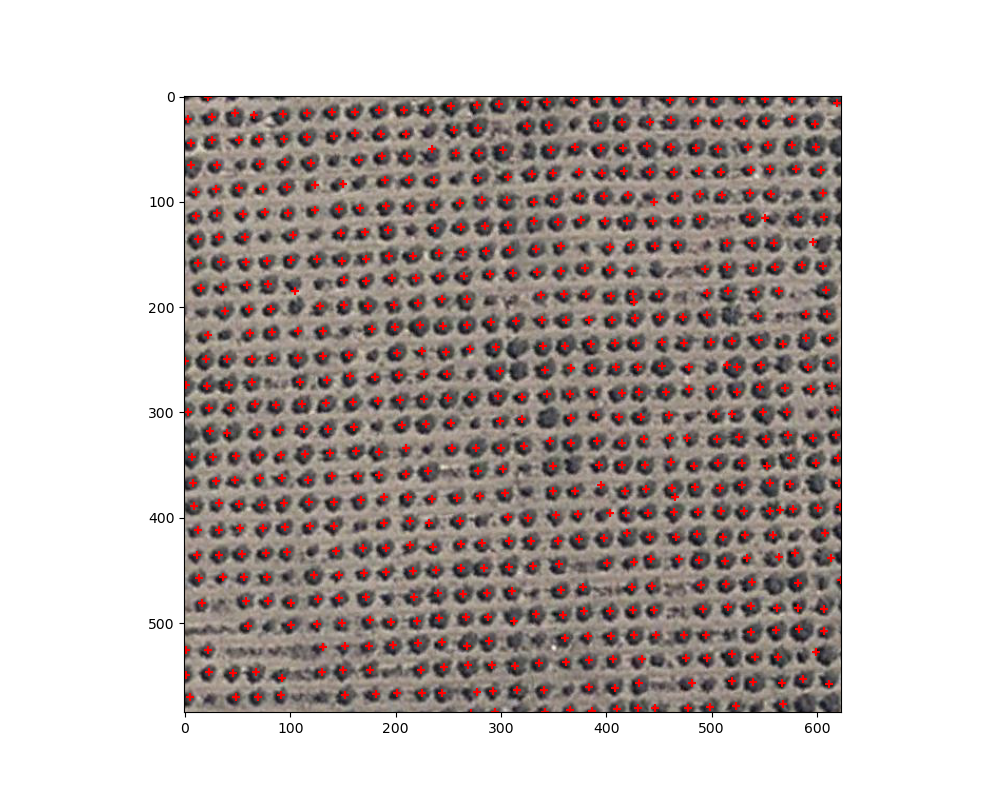

In [9]:
from sklearn.cluster import Birch
brc = Birch(branching_factor=10000, n_clusters=None, threshold=10, compute_labels=True)
brc.fit(datalist)
puntosbirch = brc.subcluster_centers_
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.scatter(puntosbirch[:,[1]],puntosbirch[:,[0]], marker='+',color='red')
ax.imshow(ImagenTotal[radio:-radio,radio:-radio,:])

In [10]:
len(puntosbirch)

621